# Line Plot

* Line Plot: 연속적으로 변화하는 값을 순서대로 점으로 나타내고, 이를 선으로 연결한 그래프
* 시간/순서에 대한 변화에 적합하여 추세를 살피기 위해 사용  


* Line Plot을 사용할 때 5개 이하의 선을 사용하는 것을 추천 (왜? 더 많은 선은 중첩으로 인한 가독성 하락)  
* 선을 구분하는 요소들:  
    * 색상 (```color```)  
    * 마커 (```marker```, ```markersize```)  
    * 선의 종류 (```linestyle```, ```linewidth```)  

* 시시각각 변동하는 데이터는 Noise로 인해 패턴 및 추세 파악이 어려움
* 그러므로 Noise의 인지적인 방해를 줄이기 위해 smoothing을 사용한다

* 축을 0에 초점을 둘 필요는 없음
* Minimum 값과 Maximum 값에서 살작 마진을 줘서 표현하는 것이 좋음
* 추세에 집중


* 규칙적인 간격이 아니면 오해를 줄 수 있다.
* 기울기로 대략적인 정보를 얻는다.
* 그래프 상에서 간격이 다를 때 기울기 정보에 대해 오해를 줄 수 있다.
* 규칙적인 간격의 데이터가 아니라면 각 관측 값에 점으로 표시하여 오해를 줄이자.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

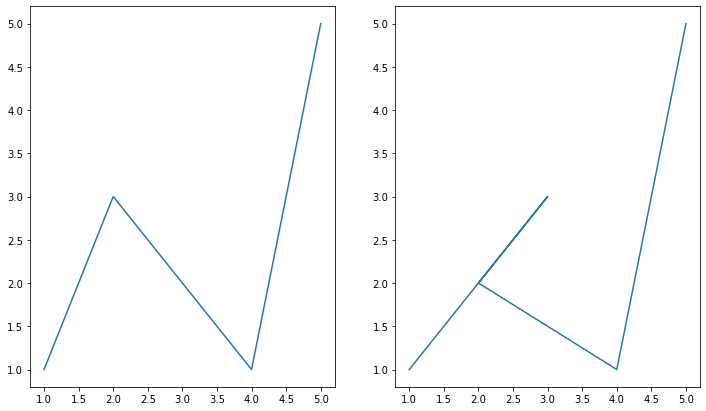

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

x1 = [1, 2, 3, 4, 5]    # x축이 정렬 된 상태로 사용
x2 = [1, 3, 2, 4, 5]    # 틀린 사용법
y = [1, 3, 2, 1, 5]

axes[0].plot(x1, y)
axes[1].plot(x2, y)

plt.show()

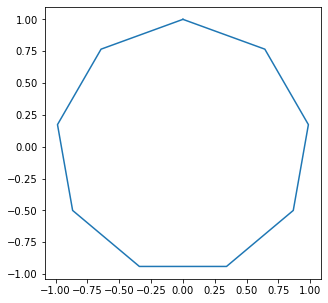

In [10]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, aspect=1)

n = 10
x = np.sin(np.linspace(0, 2*np.pi, n))
y = np.cos(np.linspace(0, 2*np.pi, n))

ax.plot(x, y)

plt.show()

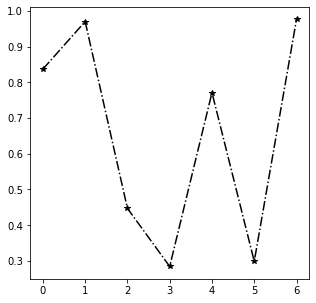

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

np.random.seed(97)    # random에 seed 설정하여 계속 똑같은 값 나오도록 설정
x = np.arange(7)
y = np.random.rand(7)

ax.plot(x, y,
       color='black',     # 선의 색
       marker='*',        # 마커
       linestyle='dashdot')    # 선 종류 (solid, dashed, dashdot, dotted, None)

plt.show()

## Line Plot을 위한 전처리

In [23]:
stock = pd.read_csv('./prices.csv')
stock['date'] = pd.to_datetime(stock['date'], format='%Y-%m-%d', errors='raise')
stock.set_index('date', inplace=True)
stock

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


In [24]:
apple = stock[stock['symbol']=='AAPL']
google = stock[stock['symbol']=='GOOGL']
google.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
2010-01-05,GOOGL,627.180001,623.990017,621.540016,627.839984,6003300.0
2010-01-06,GOOGL,625.860033,608.260035,606.360021,625.860033,7949400.0
2010-01-07,GOOGL,609.400008,594.100015,592.649990,609.999993,12815700.0
2010-01-08,GOOGL,592.000005,602.020005,589.110015,603.250036,9439100.0


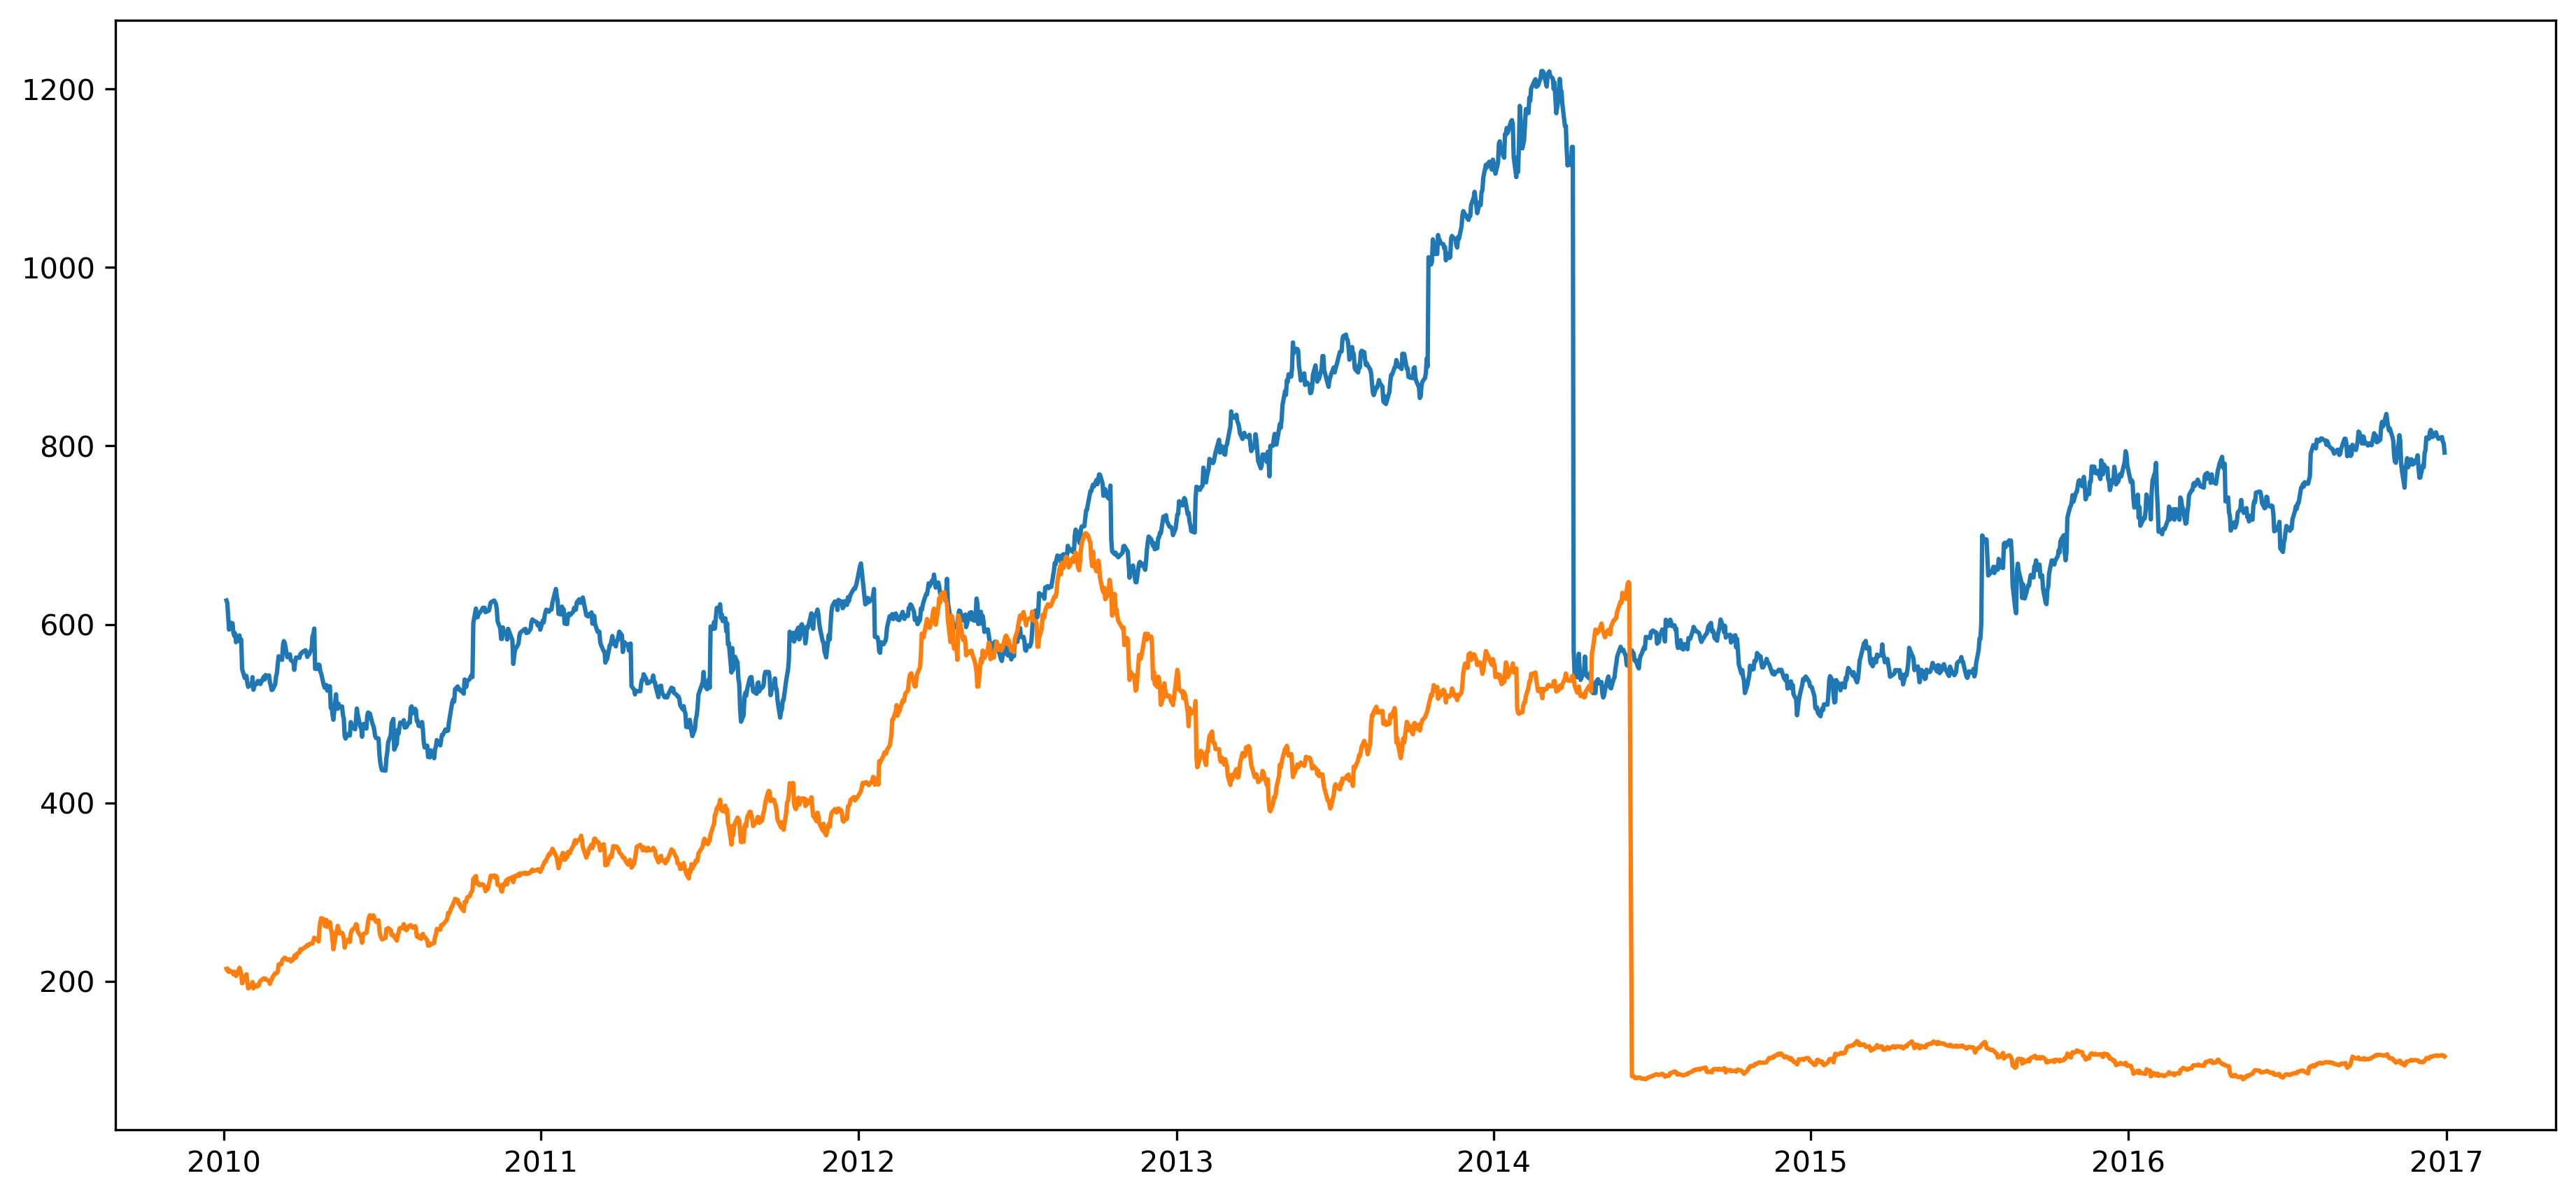

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7), dpi=300)

ax.plot(google.index, google['close'])
ax.plot(apple.index, apple['close'])

plt.show()

In [29]:
# 이동평균 사용하기
google_rolling = google.rolling(window=10).mean()    # 10개의 구간을 합쳐 평균을 내서 한 구간으로 만듦

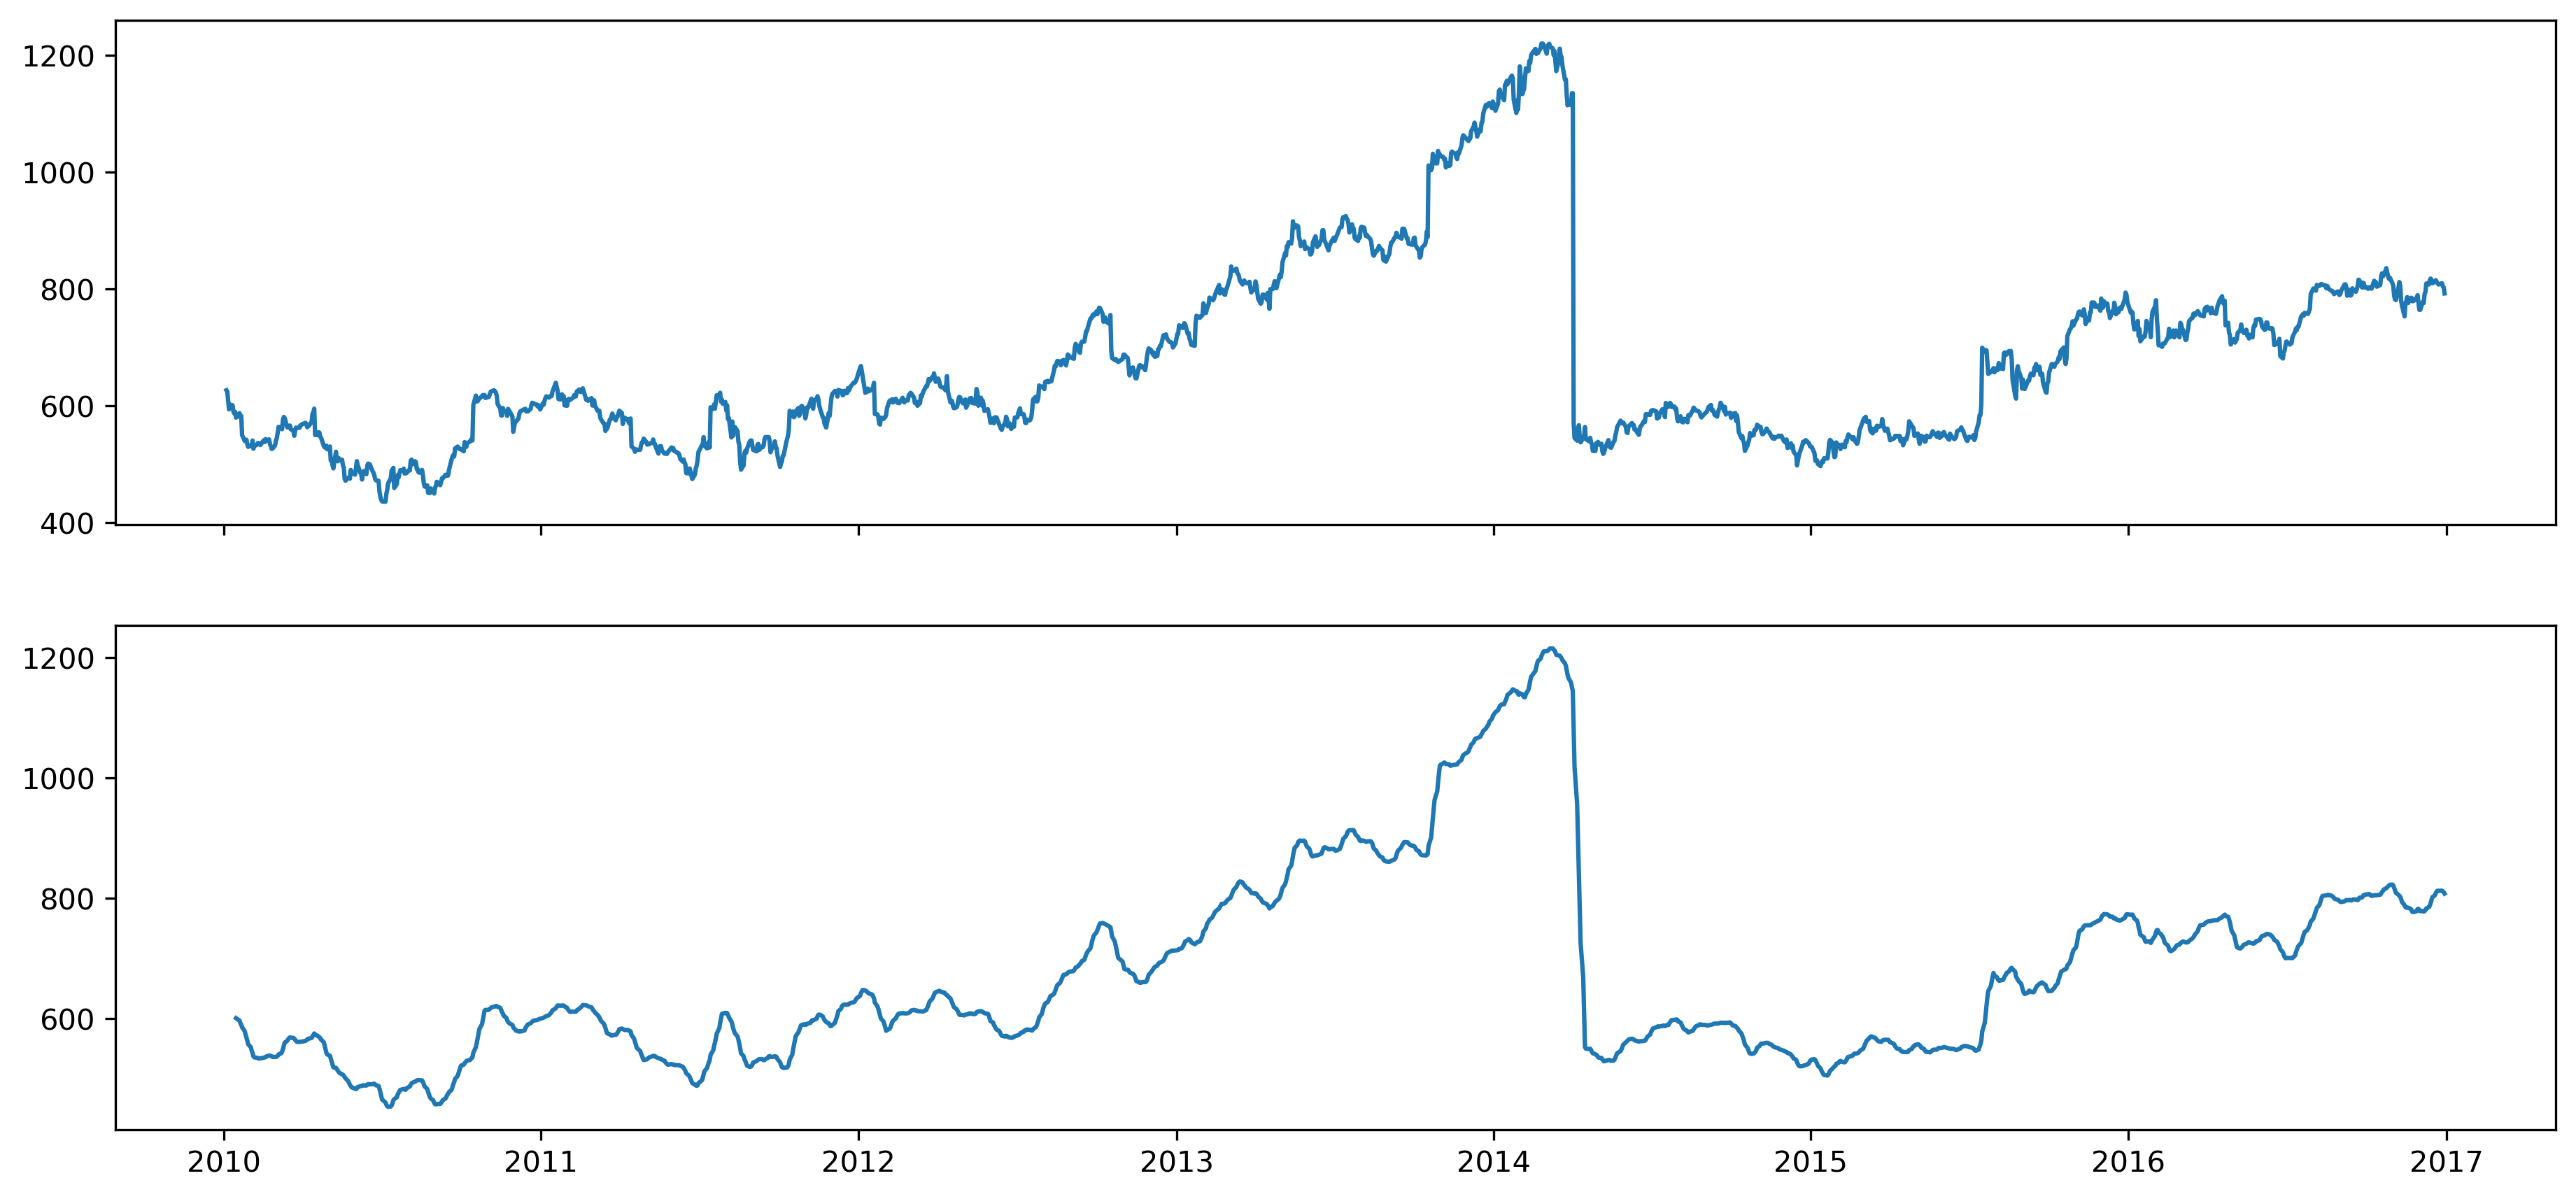

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7), dpi=300, sharex=True)

axes[0].plot(google.index, google['close'])
axes[1].plot(google_rolling.index, google_rolling['close'])

plt.show()

## 정확한 Line Plot

### 추세에 집중

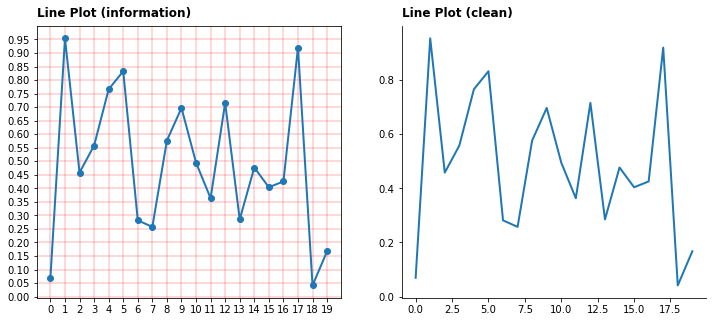

In [42]:
from matplotlib.ticker import MultipleLocator

fig = plt.figure(figsize=(12, 5))

np.random.seed(970725)

x = np.arange(20)
y = np.random.rand(20)

# Ax1
ax1 = fig.add_subplot(121)
ax1.plot(x, y, 
        marker='o',
        linewidth=2)
ax1.xaxis.set_major_locator(MultipleLocator(1))      # x축에는 1 단위로 그리드를 그리고
ax1.yaxis.set_major_locator(MultipleLocator(.05))    # y축에는 0.05 단위로 그리드를 그린다
ax1.grid(linewidth=.3, color='red')

# Ax2
ax2 = fig.add_subplot(122)
ax2.plot(x, y, linewidth=2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_title(f'Line Plot (information)', loc='left', fontsize=12, va='bottom', fontweight='semibold')
ax2.set_title(f'Line Plot (clean)', loc='left', fontsize=12, va='bottom', fontweight='semibold')

plt.show()

### 간격

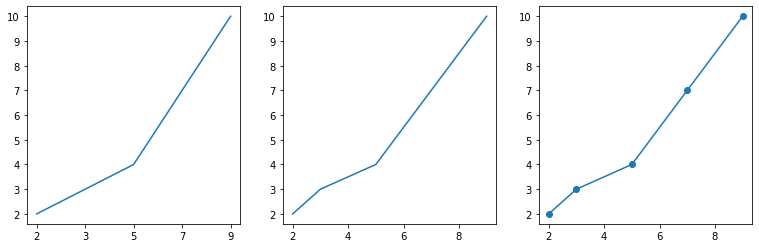

In [44]:
x = [2, 3, 5, 7, 9]
y = [2, 3, 4, 7, 10]

fig, axes = plt.subplots(1, 3, figsize=(13, 4))    # Line Plot을 그릴때는 y값 뿐만 아니라 최대한 x값을 명시하여야 한다
axes[0].plot([str(i) for i in x], y)
axes[1].plot(x, y)
axes[2].plot(x, y, marker='o')

plt.show()

### 이중 축 사용

#### ```twinx()``` 사용

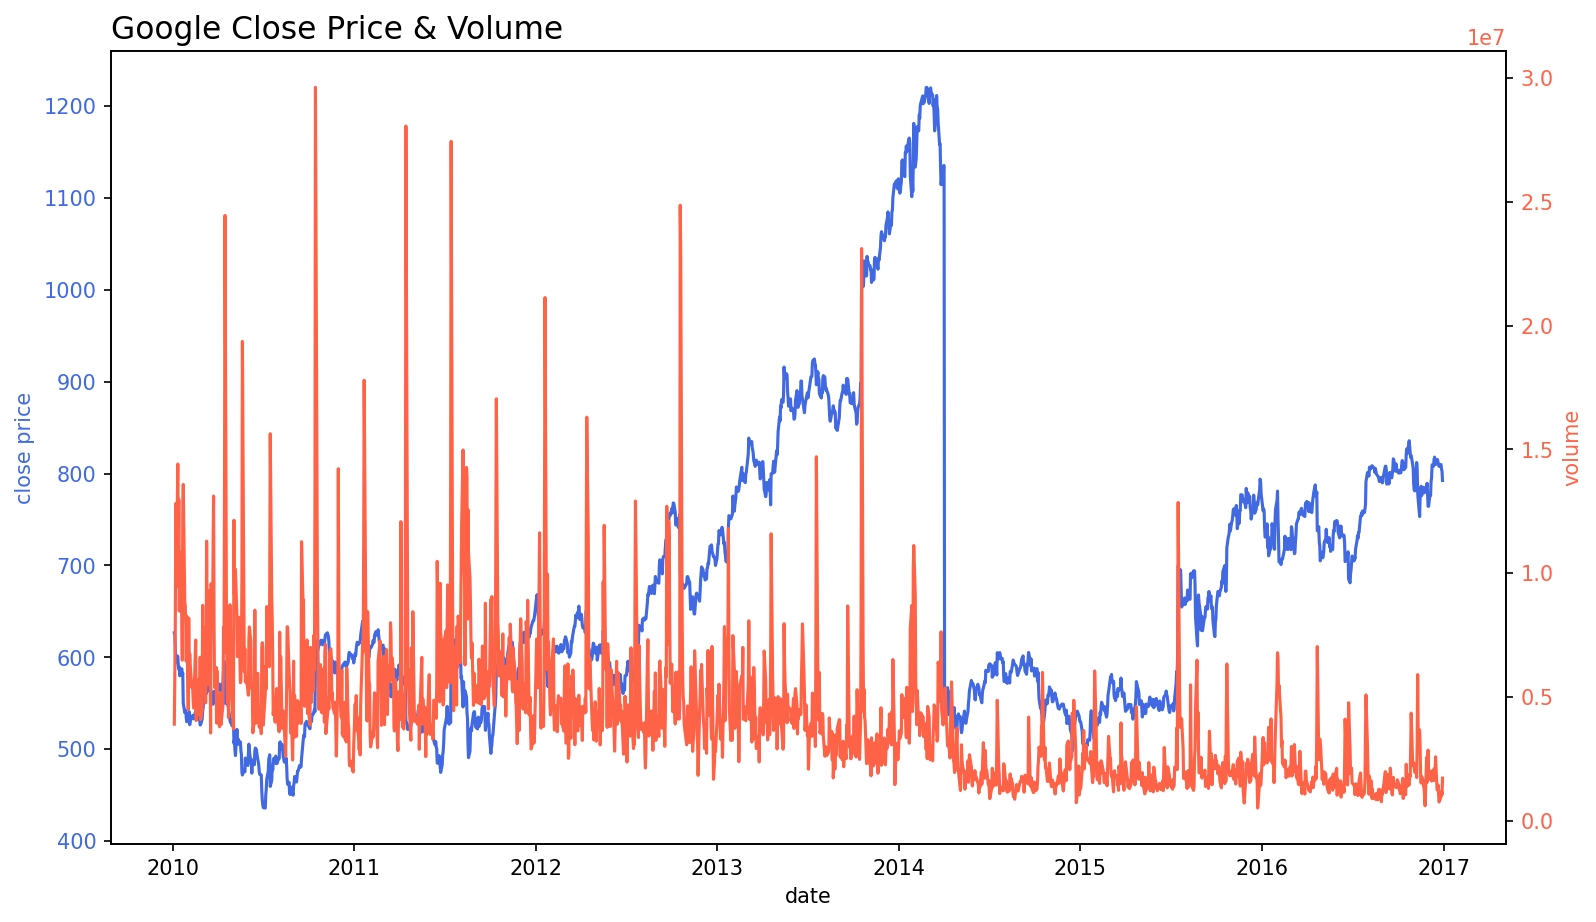

In [48]:
fig, ax1 = plt.subplots(figsize=(12, 7), dpi=150)

# First Plot
color = 'royalblue'

ax1.plot(google.index, google['close'], color=color)
ax1.set_xlabel('date')
ax1.set_ylabel('close price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Second Plot
ax2 = ax1.twinx()       # 똑같은 객체지만 다르게 정의할 수 있는 이중축
color = 'tomato'

ax2.plot(google.index, google['volume'], color=color)
ax2.set_ylabel('volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)


ax1.set_title('Google Close Price & Volume', loc='left', fontsize=15)
plt.show()

#### ```secondary_xaxis()```

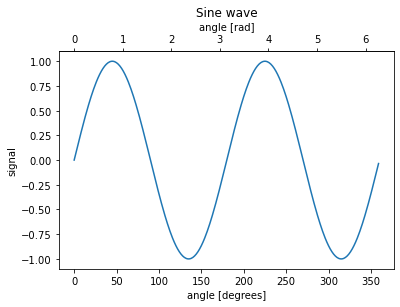

In [52]:
def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

fig, ax = plt.subplots()
x = np.arange(0, 360)
y = np.sin(2 * x * np.pi / 180)
ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')

# secondary_xaxis() 를 이용하여 top에 axis label을 추가함
secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))    
secax.set_xlabel('angle [rad]')

plt.show()

#### ETC

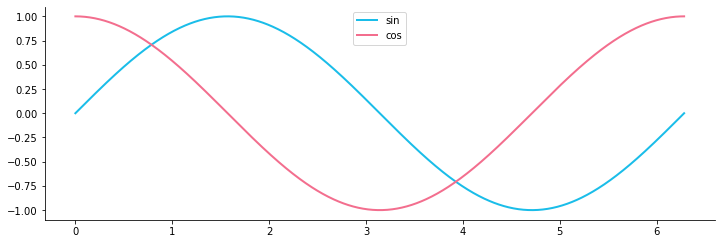

In [53]:
fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)


ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2, label='sin')

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2, label='cos')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper center')

plt.show()

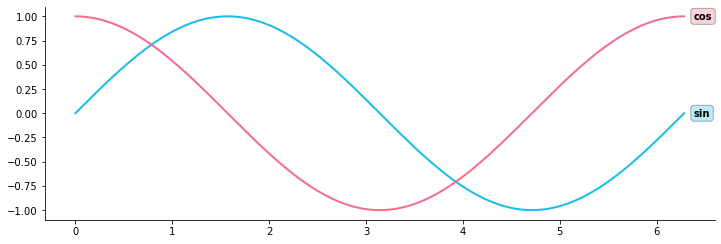

In [54]:
fig = plt.figure(figsize=(12, 5))

x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

# Ax2
ax = fig.add_subplot(111, aspect=1)
ax.plot(x, y1,
       color='#1ABDE9',
       linewidth=2,)

ax.plot(x, y2,
       color='#F36E8E',
       linewidth=2,)

ax.text(x[-1]+0.1, y1[-1], s='sin', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#1ABDE9', ec='black', alpha=0.3))

ax.text(x[-1]+0.1, y2[-1], s='cos', fontweight='bold',
         va='center', ha='left', 
         bbox=dict(boxstyle='round,pad=0.3', fc='#F36E8E', ec='black', alpha=0.3))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

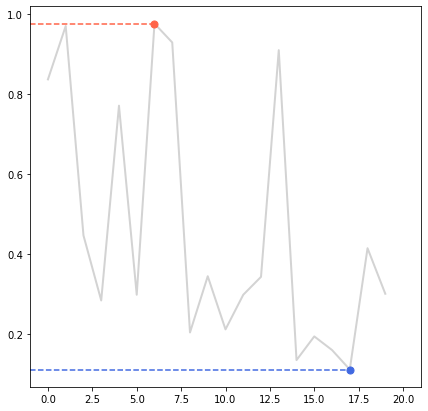

In [55]:
fig = plt.figure(figsize=(7, 7))

np.random.seed(97)

x = np.arange(20)
y = np.random.rand(20)

ax = fig.add_subplot(111)
ax.plot(x, y,
       color='lightgray',
       linewidth=2,)

ax.set_xlim(-1, 21)

# max
ax.plot([-1, x[np.argmax(y)]], [np.max(y)]*2,
        linestyle='--', color='tomato'
       )

ax.scatter(x[np.argmax(y)], np.max(y), 
            c='tomato',s=50, zorder=20)

# min
ax.plot([-1, x[np.argmin(y)]], [np.min(y)]*2,
        linestyle='--', color='royalblue'
       )
ax.scatter(x[np.argmin(y)], np.min(y), 
            c='royalblue',s=50, zorder=20)

plt.show()